### **Please run these lines first!**

In [1]:
'''
Thanh Tran
22/06/2021
'''
from torchvision.datasets import MNIST
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

from torch import nn
import matplotlib.pyplot as plt

In [2]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 12.3MB/s 
     |████████████████████████████████| 194kB 24.6MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 


In [3]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [5]:
#loading datasets from pytorch
trainset = MNIST('../', download=True, train=True)
testset = MNIST('../', download=True, train=False)


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw




Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw




Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw




Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Hello World model

To gain better understanding of this cycle,
I will provide an example with **10 digits classification problem**

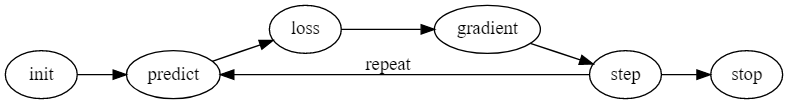

### What do we have?

In [6]:
# Show one sample?
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [7]:
trainset.data[4]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

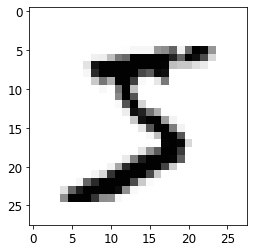

In [ ]:
# Show this sample as an image.
plt.imshow(trainset.data[0])

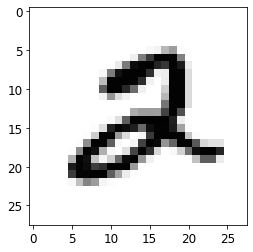

In [11]:
plt.imshow(trainset.data[5])

In [12]:
# Show the shape of this image.
trainset.data[0].shape

torch.Size([28, 28])

In [14]:
trainset.data[10].shape

torch.Size([28, 28])

In [15]:
# Get labels for train and test set
y_train = trainset.targets
y_test = testset.targets

In [16]:
# Show the label of trainset.data[0]
y_train[0]  # indeed, the label for the first image is a 5

tensor(5)

In [18]:
y_train[5]

tensor(2)

In [19]:
# Show the shape of train and test set
trainset.data.shape, testset.data.shape # 60 000 images for training, 10 000 for testing

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [20]:
# How to have all the pixels for an image in a single row ?
train = trainset.data.reshape(60000, -1)
test = testset.data.reshape(10000, -1)


In [21]:
# Have a look at the shape of train and test
train.shape[1] == 784
test.shape[1] == 784

True

In [22]:
assert train.shape[1] == 784
assert test.shape[1] == 784

In [30]:
# Show datatype of train
train.dtype


torch.float32

In [31]:
# Convert data to float32 torch tensors (float works better with Pytorch)
train = train.to(torch.float32)
test = test.to(torch.float32)

### Normalise data

In [32]:
# The data isn't normalized
# use the tensor method in the 3.1 notebook to print the mean and 
# standard deviation of the data
m, std = train.mean(), train.std()
print(m.item(), std.item())

assert m.item() == 33.31842041015625
assert std.item() == 78.56748962402344

33.31842041015625 78.56748962402344


In [33]:
# Normalise it
train = (train - m) / std
test = (test - m) / std # do the same for the test set
print(train.mean(), train.std())  # 0 and 1, good

tensor(1.8892e-08) tensor(1.)


In [34]:
print("All possible classes (the numbers from 0 to 9):", y_train.unique())
print("There are", len(y_train.unique()), "classes")

All possible classes (the numbers from 0 to 9): tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
There are 10 classes


### Define a simple model/ MLP

In [67]:
# Build a model
model = nn.Sequential(
    nn.Linear(28*28,30),#linear get 784-> 30
    nn.ReLU(), #non-linearity
    nn.Linear(30, 10),#linear 30->10
)

In [68]:
train

tensor([[-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        ...,
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241]])

In [69]:
# input your train data into your model to get predictions...
  # should be torch.Size([60000, 10]), 10 preds for each of the 60k imgs
output=model(train)
output.shape
output[0]

tensor([ 0.3465,  0.1948, -0.5348,  0.4967, -0.1991, -0.6156, -0.4539,  0.1356, -0.2288,  0.0732], grad_fn=<SelectBackward>)

-> It outputs 10 numbers for each image in our dataset. 

In other words, "For this sample, what is the probability that it is a 0 ? a one ? a two ? ... a nine ?"

***Are those numbers actually probabilities ?***

### Loss

In [70]:
output[1]

tensor([ 0.1986, -0.0328, -0.6640,  0.3184, -0.0666, -0.3468, -0.4863,  0.3614, -0.5235,  0.0777], grad_fn=<SelectBackward>)



***No, and we need a loss function (cross entropy)***


1.   transform those numbers into numbers that behave like probabilities (they will sum to 1, and none will be greater than 1 or inferior to 0).
2.   out of these 10 probability, it picks the one that relates to the class your model should have predicted. If this number happens to be 1, great: you predicted 100% probability that is was the correct class. If it's less than that, you get a penalty.



## Forward pass


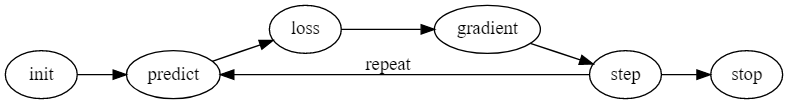

In [71]:
output_model = model(train)
cr_loss = nn.CrossEntropyLoss()
loss = cr_loss(output_model, y_train)
loss

tensor(2.3499, grad_fn=<NllLossBackward>)

## Training Loop

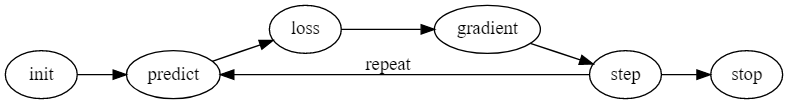

In [73]:
class BasicOptim: #We can use this information to create an optimizer:
    def _init_(self, params, lr):
      self.params = list(params)
      self.lr = lr

    def step(self, *arg, **kwargs):
      for p in self.params: p.data -= p.grad.data*self.lr
      
    def zero_grad(self, *arg, **kwargs):
      for p in self.params: p.grad = None

In [74]:
LR=0.1
#Data and labels:
INPUT = train
TARGETS = y_train

# parameters we can change:

cr_loss = nn.CrossEntropyLoss() #F.cross_entropy(output, y_train)
#optimizer = torch.optim.Adam(model.parameters(), LR)

#our own Optimizer
optimizer = BasicOptim(model.parameters(), LR)

TypeError: ignored

Updating weightsIn a neural network, weights are updated as follows:

Step 1: Take a batch of training data.

Step 2: Perform forward propagation to obtain the corresponding loss.

Step 3: Backpropagate the loss to get the gradients.

Step 4: Use the gradients to update the weights of the network.

In [61]:
EPOCH = 50
for i in range(EPOCH):

# Training loop
    # Forward + Backprop + Loss
    ## l1_output = activation(INPUT @ layer1)  
    ## model_output = l1_output @ layer2
    output = model(INPUT)
    loss = cr_loss(output, TARGETS)
    
    ## Don't let the gradients accumulate:
    optimizer.zero_grad()

    ## The next step is to calculate the gradients. 
    ## In other words, calculate 
    ## an approximation of how the parameters need to change:
    loss.backward()

    # Update model weights
    ## update the parameters for layer1 and 2:
    optimizer.step()

    print(loss)

    # Show loss

tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBackward>)
tensor(2.3189, grad_fn=<NllLossBac

## Batch

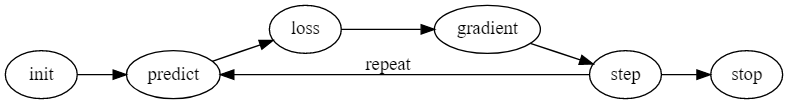

**We want a batch at a time not the entire dataset!**

In [ ]:
for i in range(EPOCHS):
    
        


    

# Run a deeper model with Fastai

"So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers."



In [ ]:
# Get MNIST SAMPLE from fastai


In [ ]:
# ResNet 18 layers

# Fit one cycle
